In [ ]:
#importimg necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the CSV file into DataFrame
df = pd.read_csv("/content/updated_digital_wellbeing.csv")
df.head()

,Daily_Usage,Phone_Unlocks,Physical_Problem,Mental_Problem,Unproductive_Usage_Seconds,Percentage_Unproductive_Usage,Addiction
0,4h 36m 29s,114,True,False,13250,79.872204,Addicted
1,7h 41m 15s,184,True,False,25003,90.345077,Addicted
2,8h 59m 41s,75,True,True,14968,46.224638,Addicted
3,5h 19m 44s,70,False,False,15288,79.691410,Addicted
4,6h 29m 17s,198,True,True,6477,27.730445,Not Addicted


**Performing Data Analysis**

<Axes: xlabel='Addiction'>

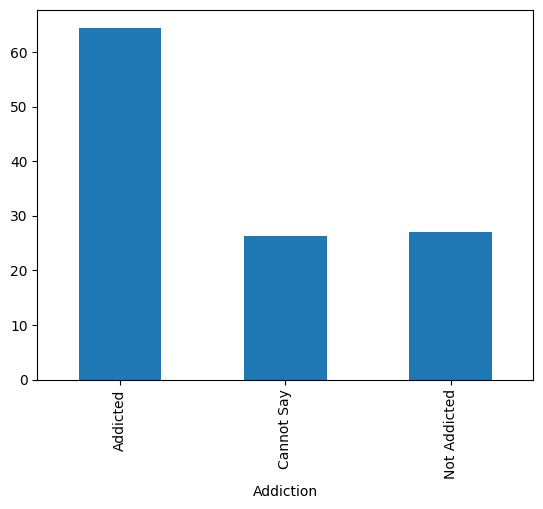

In [ ]:
# @title Percentage Unproductive Usage vs Addiction

df.groupby('Addiction')['Percentage_Unproductive_Usage'].mean().plot(kind='bar')

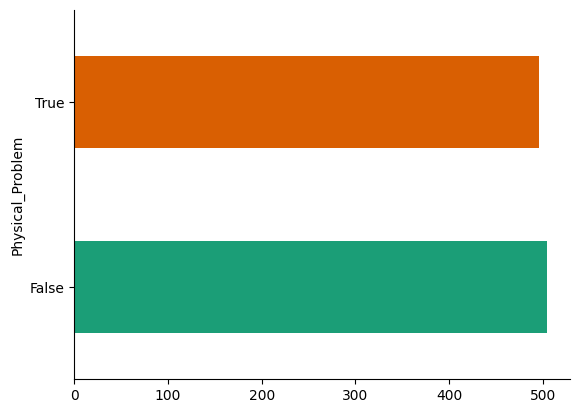

In [ ]:
# title Physical_Problem

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Physical_Problem').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

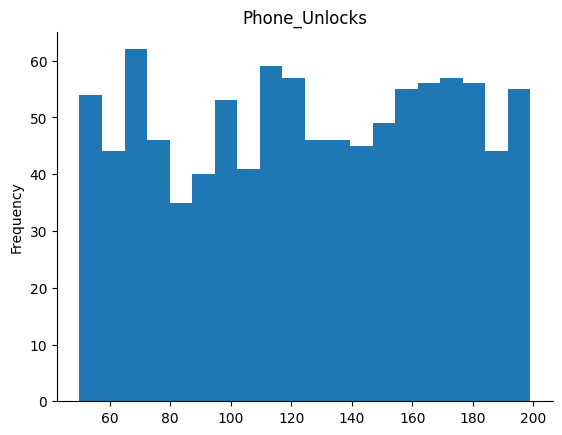

In [ ]:
# title Phone_Unlock

from matplotlib import pyplot as plt
df['Phone_Unlocks'].plot(kind='hist', bins=20, title='Phone_Unlocks')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

Daily_Usage                      0
Phone_Unlocks                    0
Physical_Problem                 0
Mental_Problem                   0
Unproductive_Usage_Seconds       0
Percentage_Unproductive_Usage    0
Addiction                        0
dtype: int64

From the above command we find that there are no null values in our dataset

Performing Data Preprocessing and Label Encoding

In [ ]:
#Pre-processing Steps
# Used to convert qualitative values to numeric values (binary or numeric)
label_encoder = LabelEncoder()
df['Physical_Problem'] = label_encoder.fit_transform(df['Physical_Problem'])
df['Mental_Problem'] = label_encoder.fit_transform(df['Mental_Problem'])
# Define the mapping
addiction_mapping = {'Addicted': 1, 'Not Addicted': 0, 'Cannot Say': 2}

# Convert 'Daily Usage' column to total seconds
df['Daily_Usage'] = pd.to_timedelta(df['Daily_Usage']).dt.total_seconds()

# Map the 'Addiction' column
df['Addiction'] = df['Addiction'].map(addiction_mapping)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Addiction' column
# First, convert 'Cannot Say' to NaN to avoid conflicts with label encoding
df['Addiction'] = df['Addiction'].replace('Cannot Say', float('nan'))
df['Addiction'] = label_encoder.fit_transform(df['Addiction'])


In [ ]:
df.head()

,Daily_Usage,Phone_Unlocks,Physical_Problem,Mental_Problem,Unproductive_Usage_Seconds,Percentage_Unproductive_Usage,Addiction
0,16589.0,114,1,0,13250,79.872204,1
1,27675.0,184,1,0,25003,90.345077,1
2,32381.0,75,1,1,14968,46.224638,1
3,19184.0,70,0,0,15288,79.691410,1
4,23357.0,198,1,1,6477,27.730445,0


In [ ]:
# Generating statistical data
df.describe()

,Daily_Usage,Phone_Unlocks,Physical_Problem,Mental_Problem,Unproductive_Usage_Seconds,Percentage_Unproductive_Usage,Addiction
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,23081.784000,126.036000,0.496000,0.497000,11303.956000,49.431320,0.786000
std,12872.945022,43.535181,0.500234,0.500241,9938.939553,28.813342,0.595448
min,6.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12202.500000,89.000000,0.000000,0.000000,3275.250000,24.873161,0.000000
50%,23579.000000,126.000000,0.000000,0.000000,8465.000000,49.916804,1.000000
75%,33751.750000,163.250000,1.000000,1.000000,16973.250000,72.977901,1.000000
max,53983.000000,199.000000,1.000000,1.000000,49873.000000,99.911069,2.000000


Performing Data Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separate numerical features from the dataset
numerical_features = ['Daily_Usage', 'Phone_Unlocks', 'Unproductive_Usage_Seconds', 'Percentage_Unproductive_Usage']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,Daily_Usage,Phone_Unlocks,Physical_Problem,Mental_Problem,Unproductive_Usage_Seconds,Percentage_Unproductive_Usage,Addiction
0,0.307223,0.429530,1,0,0.265675,0.799433,1
1,0.512607,0.899329,1,0,0.501333,0.904255,1
2,0.599793,0.167785,1,1,0.300122,0.462658,1
3,0.355299,0.134228,0,0,0.306539,0.797623,1
4,0.432610,0.993289,1,1,0.129870,0.277551,0


**Performing data analysis on normalised data**

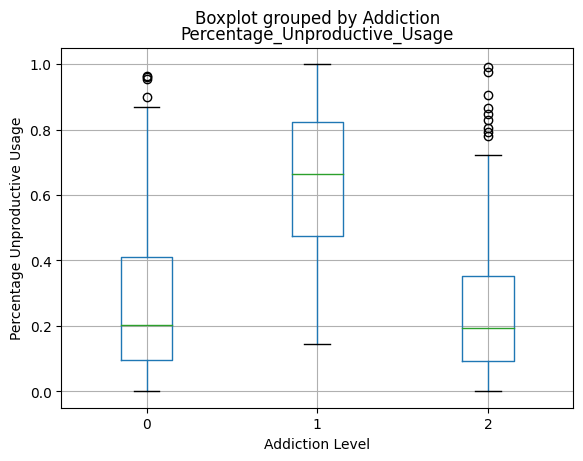

In [ ]:
# @title Percentage Unproductive Usage by Addiction Level

import matplotlib.pyplot as plt
df.boxplot('Percentage_Unproductive_Usage', by='Addiction')
plt.xlabel('Addiction Level')
_ = plt.ylabel('Percentage Unproductive Usage')

<Axes: >

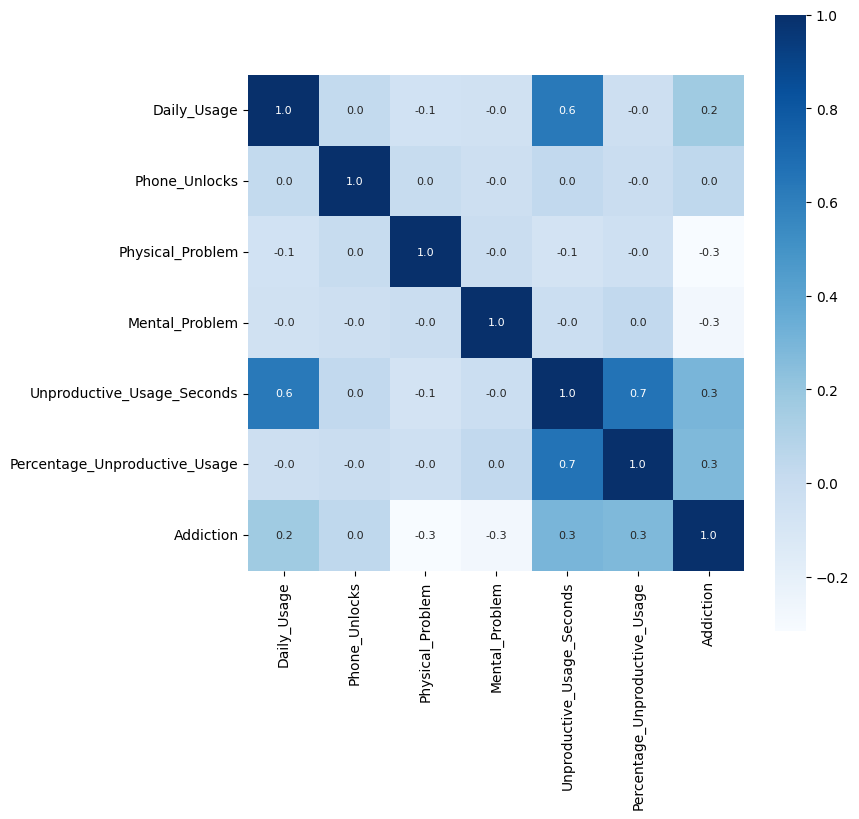

In [ ]:
# Visualising using correlation matrix
# correlation among data
correlation = df.corr(numeric_only=True)

# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar =True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [ ]:
df.head()

,Daily_Usage,Phone_Unlocks,Physical_Problem,Mental_Problem,Unproductive_Usage_Seconds,Percentage_Unproductive_Usage,Addiction
0,0.307223,0.429530,1,0,0.265675,0.799433,1
1,0.512607,0.899329,1,0,0.501333,0.904255,1
2,0.599793,0.167785,1,1,0.300122,0.462658,1
3,0.355299,0.134228,0,0,0.306539,0.797623,1
4,0.432610,0.993289,1,1,0.129870,0.277551,0


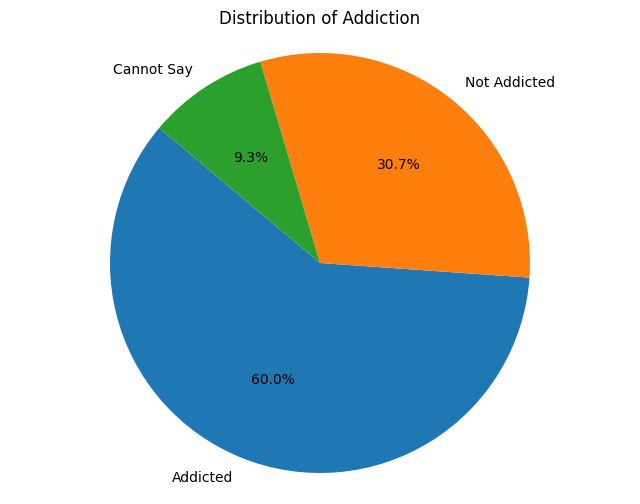

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'Addiction' column
# Replace 'df' with your actual DataFrame name

# Mapping the categories
addiction_mapping = {0: "Not Addicted", 1: "Addicted", 2: "Cannot Say"}
df['Addiction'] = df['Addiction'].map(addiction_mapping)

# Count the occurrences of each category
addiction_counts = df['Addiction'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(addiction_counts, labels=addiction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Addiction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [ ]:
df.head()

,Daily_Usage,Phone_Unlocks,Physical_Problem,Mental_Problem,Unproductive_Usage_Seconds,Percentage_Unproductive_Usage,Addiction
0,0.307223,0.429530,1,0,0.265675,0.799433,Addicted
1,0.512607,0.899329,1,0,0.501333,0.904255,Addicted
2,0.599793,0.167785,1,1,0.300122,0.462658,Addicted
3,0.355299,0.134228,0,0,0.306539,0.797623,Addicted
4,0.432610,0.993289,1,1,0.129870,0.277551,Not Addicted


Performing Feature Selection

In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Addiction'])  # Features (all columns except 'Addiction')
y = df['Addiction']  # Target variable ('Addiction' column)

# Print the columns
print(X)


     Daily_Usage  Phone_Unlocks  Physical_Problem  Mental_Problem  \
0       0.307223       0.429530                 1               0   
1       0.512607       0.899329                 1               0   
2       0.599793       0.167785                 1               1   
3       0.355299       0.134228                 0               0   
4       0.432610       0.993289                 1               1   
..           ...            ...               ...             ...   
995     0.660578       0.744966                 1               0   
996     0.293217       0.597315                 0               0   
997     0.306149       0.939597                 0               1   
998     0.215925       0.114094                 0               1   
999     0.389518       0.362416                 1               0   

     Unproductive_Usage_Seconds  Percentage_Unproductive_Usage  
0                      0.265675                       0.799433  
1                      0.501333          

In [ ]:
print(y)

0          Addicted
1          Addicted
2          Addicted
3          Addicted
4      Not Addicted
           ...     
995    Not Addicted
996        Addicted
997        Addicted
998    Not Addicted
999    Not Addicted
Name: Addiction, Length: 1000, dtype: object


Performing Train Test Split

In [ ]:
# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df.head()

,Daily_Usage,Phone_Unlocks,Physical_Problem,Mental_Problem,Unproductive_Usage_Seconds,Percentage_Unproductive_Usage,Addiction
0,0.307223,0.429530,1,0,0.265675,0.799433,Addicted
1,0.512607,0.899329,1,0,0.501333,0.904255,Addicted
2,0.599793,0.167785,1,1,0.300122,0.462658,Addicted
3,0.355299,0.134228,0,0,0.306539,0.797623,Addicted
4,0.432610,0.993289,1,1,0.129870,0.277551,Not Addicted


Evaluating various models and the performance metrics

In [ ]:
# Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
# Predictions on training data
y_pred_train_log_reg = log_reg_model.predict(X_train)
accuracy_log_reg_train = accuracy_score(y_train, y_pred_train_log_reg)
# Predictions on test data
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
# Check for overfitting
if accuracy_log_reg_train > accuracy_log_reg:
    print("Model may be overfitting to the training data.")
else:
    print("Model is not overfitting.")
# Printing the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
# Printing the data
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print(f'Logistic Regression Training Accuracy: {accuracy_log_reg_train}')


Model may be overfitting to the training data.
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Addicted       0.93      0.97      0.95       179
  Cannot Say       0.74      0.95      0.83        21
Not Addicted       0.97      0.83      0.89       100

    accuracy                           0.92       300
   macro avg       0.88      0.92      0.89       300
weighted avg       0.93      0.92      0.92       300

Logistic Regression Accuracy: 0.92
Logistic Regression Training Accuracy: 0.9328571428571428


In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Predictions on training data
y_pred_train_nb = nb_model.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_train_nb)
# Predictions on test data
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
# Check for overfitting
if accuracy_nb_train > accuracy_nb:
    print("Model may be overfitting to the training data.")
else:
    print("Model is not overfitting.")
# Printing the classification report
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
# Printing the data
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(f'Naive Bayes  Training Accuracy: {accuracy_nb_train}')

Model is not overfitting.
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

    Addicted       0.96      0.89      0.93       179
  Cannot Say       0.53      1.00      0.69        21
Not Addicted       0.94      0.88      0.91       100

    accuracy                           0.90       300
   macro avg       0.81      0.92      0.84       300
weighted avg       0.92      0.90      0.90       300

Naive Bayes Accuracy: 0.8966666666666666
Naive Bayes  Training Accuracy: 0.8842857142857142


In [ ]:
# SVM Model
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
# Predictions on training data
y_pred_train_svm = svm_model.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_train_svm)
# Predictions on test data
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
#We compare the accuracy scores for both training and testing data to check for overfitting of data on the model
if accuracy_svm_train > accuracy_svm:
    print("Model may be overfitting to the training data.")
else:
    print("Model is not overfitting.")

# Printing the classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))
# Printing the data
print(f'SVM Accuracy: {accuracy_svm}')
print(f'SVM  Training Accuracy: {accuracy_svm_train}')


Model may be overfitting to the training data.
Classification Report for SVM:
              precision    recall  f1-score   support

    Addicted       0.93      0.98      0.96       179
  Cannot Say       0.84      1.00      0.91        21
Not Addicted       0.98      0.84      0.90       100

    accuracy                           0.94       300
   macro avg       0.92      0.94      0.92       300
weighted avg       0.94      0.94      0.94       300

SVM Accuracy: 0.9366666666666666
SVM  Training Accuracy: 0.9628571428571429


In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
# Predictions on training data
y_pred_train_dt = dt_model.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_train_dt)
# Predictions on test data
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
#We compare the accuracy scores for both training and testing data to check for overfitting of data on the model
if accuracy_dt_train > accuracy_dt:
    print("Model may be overfitting to the training data.")
else:
    print("Model is not overfitting.")

# Printing the classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))
# Printing the data
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Decision Tree Accuracy: {accuracy_dt_train}')

Model is not overfitting.
Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Addicted       1.00      1.00      1.00       179
  Cannot Say       1.00      1.00      1.00        21
Not Addicted       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Decision Tree Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Training the model with the data
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# Predictions on training data
y_pred_train_rf = rf_model.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_train_rf)
# Predictions on test data
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
#We compare the accuracy scores for both training and testing data to check for overfitting of data on the model
if accuracy_rf_train > accuracy_rf:
    print("Model may be overfitting to the training data.")
else:
    print("Model is not overfitting.")
# Printing the classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
# Printing the data
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Accuracy: {accuracy_rf_train}')

Model is not overfitting.
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Addicted       1.00      1.00      1.00       179
  Cannot Say       1.00      1.00      1.00        21
Not Addicted       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Random Forest Accuracy: 1.0
Random Forest Accuracy: 1.0


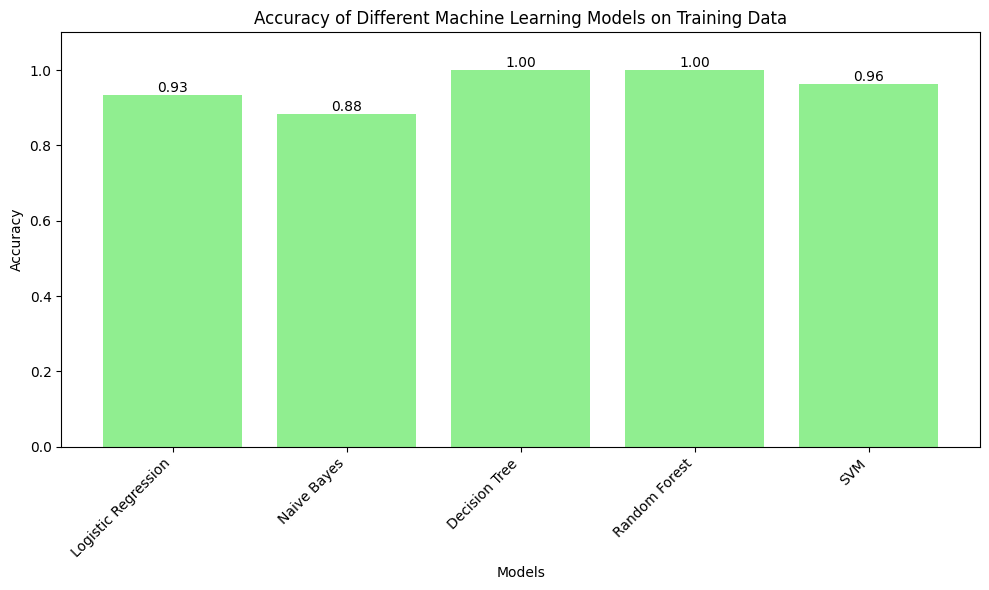

In [ ]:
# Plotting accuracies of models evaluated on train data
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [accuracy_log_reg_train, accuracy_nb_train, accuracy_dt_train, accuracy_rf_train, accuracy_svm_train]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models on Training Data')
plt.xticks(rotation=45, ha='right')

# Set the y-axis limit with a padding value
plt.ylim(0, max(accuracies) + 0.1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

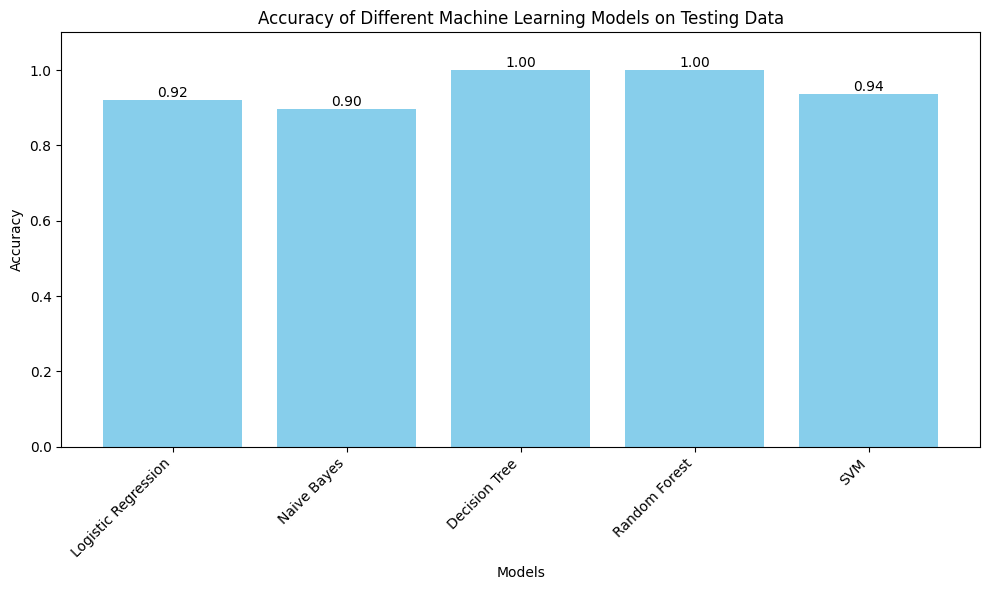

In [ ]:
# Plotting accuracies of models evaluated on test data
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [accuracy_log_reg, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models on Testing Data')
plt.xticks(rotation=45, ha='right')

# Set the y-axis limit with a padding value
plt.ylim(0, max(accuracies) + 0.1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Calculating Confusion Matrices for every model


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

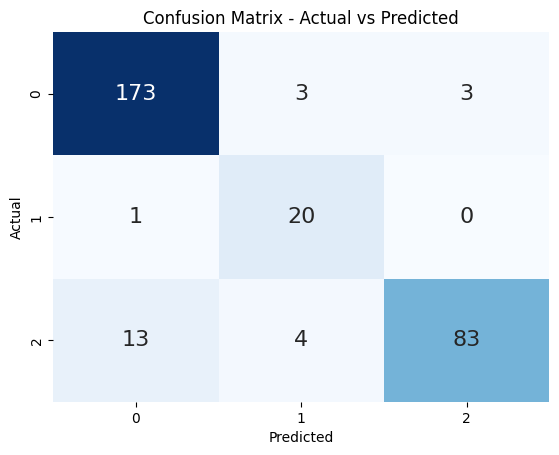

In [ ]:
# Calculate the confusion matrix for Logistic Regression model
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Heatmap for Visualisation
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()

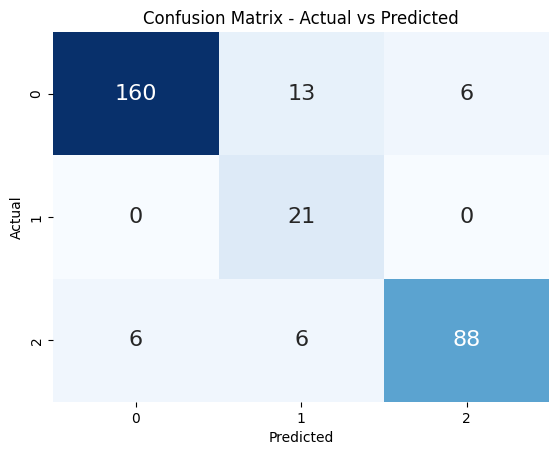

In [ ]:
# Calculate the confusion matrix for Naive Bayes model
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Heatmap for Visualisation
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()

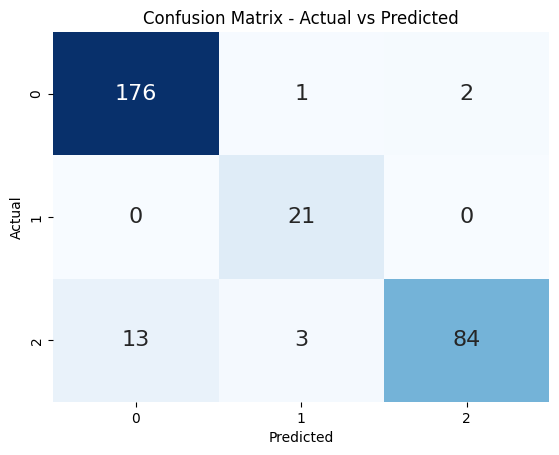

In [ ]:
# Calculate the confusion matrix for SVM
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Heatmap for Visualisation
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()

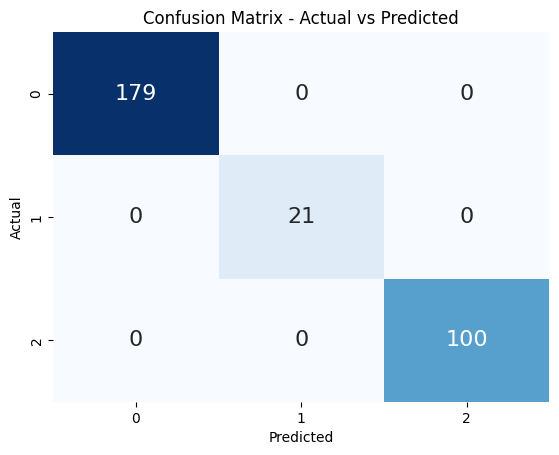

In [ ]:
# Calculate the confusion matrix for Decision Trees model
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Heatmap for Visualisation
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()

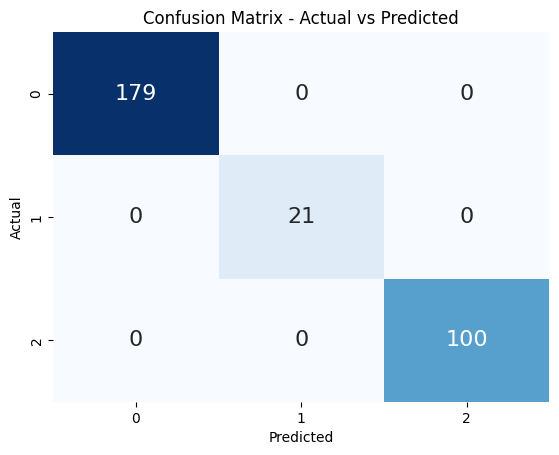

In [ ]:
# Calculate the confusion matrix for Random Forest model
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Heatmap for Visualisation
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()

In our project, we encountered a multiclass classification problem, where the objective was to classify instances into multiple classes. We opted to use the Naive Bayes classifier due to several reasons:

1. **Efficiency with Multiclass Classification**: Naive Bayes algorithms, including Gaussian Naive Bayes, are well-suited for multiclass classification tasks. They can efficiently handle datasets with multiple classes without requiring additional configuration or complexity.

2. **Simplicity and Interpretability**: Naive Bayes classifiers are based on the Bayes theorem, which makes them conceptually simple and easy to interpret. The assumption of feature independence simplifies the model, making it easier to understand and explain to stakeholders.

3. **Scalability to Large Datasets**: Naive Bayes classifiers are computationally efficient and scalable to large datasets. They have low memory requirements and can handle high-dimensional feature spaces effectively, making them suitable for scenarios where computational resources are limited.

4. **Robustness to Irrelevant Features**: Despite its simplicity, Naive Bayes is known to perform well in practice, especially when the feature independence assumption approximately holds. It can handle irrelevant features gracefully and is less susceptible to overfitting compared to more complex models.

5. **Performance on Multiclass Problems**: Empirical studies and real-world applications have demonstrated the effectiveness of Naive Bayes classifiers in multiclass classification scenarios. While they may not always achieve state-of-the-art performance, they often provide competitive results with minimal tuning.



In [ ]:
df.head()

,Daily_Usage,Phone_Unlocks,Physical_Problem,Mental_Problem,Unproductive_Usage_Seconds,Percentage_Unproductive_Usage,Addiction
0,0.307223,0.429530,1,0,0.265675,0.799433,Addicted
1,0.512607,0.899329,1,0,0.501333,0.904255,Addicted
2,0.599793,0.167785,1,1,0.300122,0.462658,Addicted
3,0.355299,0.134228,0,0,0.306539,0.797623,Addicted
4,0.432610,0.993289,1,1,0.129870,0.277551,Not Addicted


Making a Predictive Model

In [ ]:
import pandas as pd

# Assuming your model is named nb_model
# Load the new data into a DataFrame
new_data_point = pd.DataFrame({
    'Daily_Usage': [0.512607],
    'Unproductive_Usage_Seconds': [0.501333],
    'Phone_Unlocks': [0.899329],
    'Percentage_Unproductive_Usage': [0.904255],
    'Physical_Problem': [1],  # Label-encoded value for False
    'Mental_Problem': [0]  # Label-encoded value for False
})

# Reshape the DataFrame for a single data point
new_data_point_reshaped = new_data_point.iloc[0].values.reshape(1, -1)

# Make predictions using the trained model
prediction = nb_model.predict(new_data_point_reshaped)

print("Prediction for the new data point:", prediction[0])


Prediction for the new data point: Addicted


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


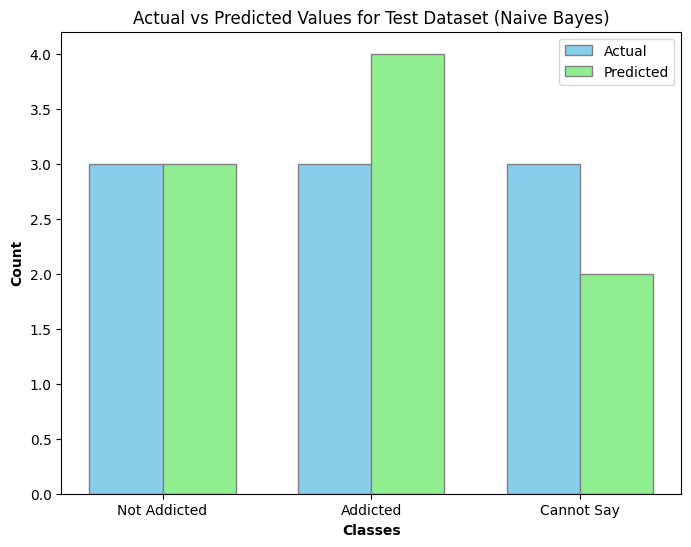

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
y_test = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
y_pred_nb = np.array([0, 1, 1, 0, 1, 2, 0, 1, 2])

# Define the classes
classes = ['Not Addicted', 'Addicted', 'Cannot Say']

# Calculate the counts of actual and predicted values for each class
actual_counts = [sum(y_test == i) for i in range(3)]
predicted_counts = [sum(y_pred_nb == i) for i in range(3)]

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(r1, actual_counts, color='skyblue', width=bar_width, edgecolor='grey', label='Actual')
plt.bar(r2, predicted_counts, color='lightgreen', width=bar_width, edgecolor='grey', label='Predicted')

# Adding labels
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(classes))], classes)

# Adding legend
plt.legend()

# Adding title
plt.title('Actual vs Predicted Values for Test Dataset (Naive Bayes)')

# Show plot
plt.show()
